## Model Development

Now that we have our cleaned data with required features, lets proceed with model development 

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from math import sqrt

%matplotlib inline

Loading our data into dataframe

In [2]:
df_properties = pd.read_csv('cleaned_property_data.csv')
df_properties = pd.get_dummies(df_properties, columns=['neighborhood', 'quality'])
df_properties.head()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,...,neighborhood_The Hills,neighborhood_The Views,neighborhood_Town Square,neighborhood_Umm Suqeim,neighborhood_World Trade Center,neighborhood_wasl gate,quality_High,quality_Low,quality_Medium,quality_Ultra
0,5528049,25.113208,55.138932,2700000,1079,2502.32,1,2,False,False,...,0,0,0,0,0,0,0,0,1,0
1,6008529,25.106809,55.151201,2850000,1582,1801.52,2,2,False,False,...,0,0,0,0,0,0,0,0,1,0
2,6034542,25.063302,55.137728,1150000,1951,589.44,3,5,True,True,...,0,0,0,0,0,0,0,0,1,0
3,6326063,25.227295,55.341761,2850000,2020,1410.89,2,3,False,True,...,0,0,0,0,0,0,0,1,0,0
4,6356778,25.114275,55.139764,1729200,507,3410.65,0,1,False,False,...,0,0,0,0,0,0,0,0,1,0


Spliting our data into 70/30 split for training and testing dataset. We are also making a copy of test data for publishing predictions

In [3]:
df_train = df_properties.sample(frac = .7)
df_test = df_properties[~df_properties.id.isin(df_train.id)]
df_prediction = df_test[['id', 'price']].copy()

Training dataframe

In [4]:
df_train.shape

(1334, 94)

Testing dataframe

In [5]:
df_test.shape

(571, 94)

Target feature for prediction

In [6]:
y_train = df_train['price'].values

Excluding target feature from the training dataset

In [7]:
X = df_train

y = y_train

Splitting training dataset for model training.

In [8]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

For prediction modelling we will use following models:
    
- LGBMRegressor
- RandomForestRegressor
- XGBRegressor
- LGBMRegressor

We will train our models using training dataset consisting of 1334 properties and then test them against our testing dataset with 571 properties.

We will check our R2 score for each model and we will select the predictions from the model which is closest to value of 1. R2 scores range from 0 to 1.

Based on best R2 score we will match actual values with predicted values and see the percentage difference.

### GradientBoostingRegressor

#### Training

In [9]:
#np.random.seed(42)

gradient = GradientBoostingRegressor(n_estimators = 5000)
gradient.fit(X_train, y_train)
gradient_predictions = gradient.predict(X_test)

#### Testing

In [10]:
gradient_predictions = gradient.predict(df_test)
gradient_r2_score = r2_score(df_prediction.price, gradient_predictions)
print('R2 Score for GradientBoostingRegressor', gradient_r2_score)

R2 Score for GradientBoostingRegressor 0.9992177542939731


### RandomForestRegressor

#### Training

In [11]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
forest_prediction = random_forest.predict(X_test)

#### Testing

In [12]:
forest_prediction = random_forest.predict(df_test)
forest_r2_score = r2_score(df_prediction.price, forest_prediction)
print('R2 Score for RandomForestRegressor', forest_r2_score)

R2 Score for RandomForestRegressor 0.9950688951884792


### XGBRegressor

#### Training

In [13]:
xgbr_regressor = XGBRegressor()
xgbr_regressor.fit(X_train, y_train)
xgbr_regressor_prediction = xgbr_regressor.predict(X_test)

#### Testing

In [14]:
xgbr_regressor_prediction = xgbr_regressor.predict(df_test)
xgbr_regresso_r2_score = r2_score(df_prediction.price, xgbr_regressor_prediction)
print('R2 Score for XGBRegressor', xgbr_regresso_r2_score)

R2 Score for XGBRegressor 0.997932732521642


### LGBMRegressor

#### Training

In [15]:
lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X_train, y_train)
lgbm_regressor_prediction = lgbm_regressor.predict(X_test)

#### Testing

In [16]:
lgbm_regressor_prediction = lgbm_regressor.predict(df_test)
lgbm_regresso_r2_score = r2_score(df_prediction.price, lgbm_regressor_prediction)
print('R2 Score for LGBMRegressor', lgbm_regresso_r2_score)

R2 Score for LGBMRegressor 0.9392420734086722


### Predictions

As we can see, the best R2 score which was closest to one was 0.9969415502320559. 

These predictions were out from RandomForestRegressor model

In [22]:
pd.options.display.float_format = '{:.2f}'.format
df_prediction['predicted_price'] = gradient_predictions
df_prediction['percentage_difference'] = ((df_prediction.price - df_prediction.predicted_price)/
                                          df_prediction.price * 100) * -1

Below you can see the % difference between the actual property price and percentage difference

In [23]:
df_prediction.head(15)

,id,price,predicted_price,percentage_difference
0,5528049,2700000,2685340.85,-0.54
2,6034542,1150000,1140567.54,-0.82
3,6326063,2850000,2788238.78,-2.17
14,6505084,2089999,2097374.39,0.35
17,6530645,2700000,2716200.64,0.60
19,6587672,950000,955369.68,0.57
23,6768809,3349000,3312153.78,-1.10
25,6799796,2499000,2512303.78,0.53
26,6810606,2800000,2809747.17,0.35
30,6840187,1465777,1461125.23,-0.32


Here is the graphical representation of our predicted values against actual property prices.

It turned out to be very good. You can hardly see the blue line. You can only observe them at the edges.

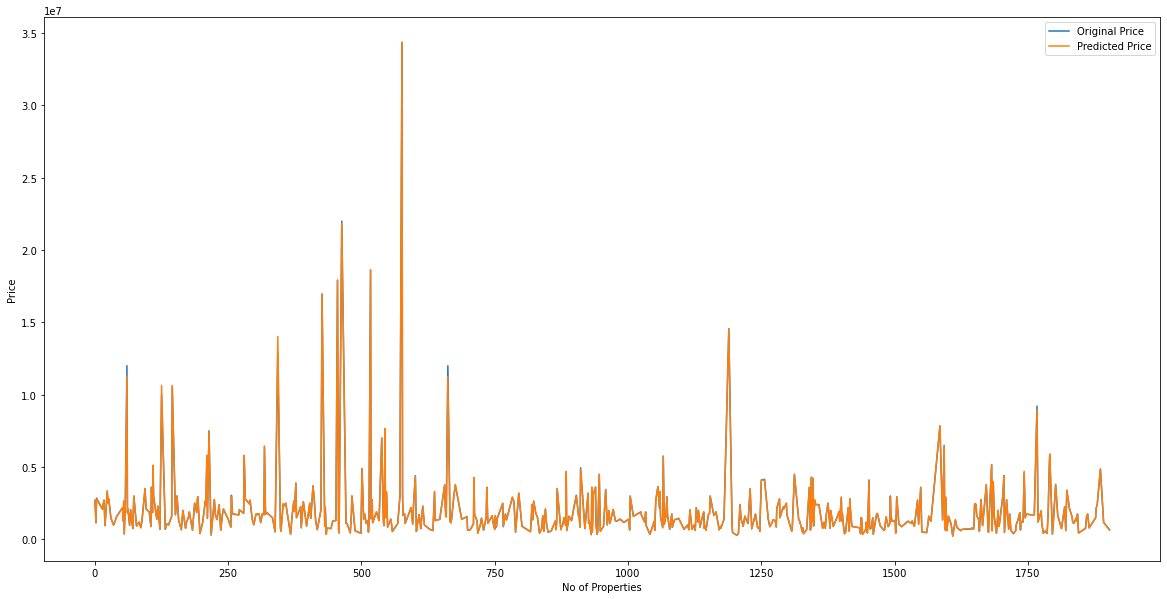

In [31]:
# Plotting the Train and Test scores
plt.figure(figsize=(20,10))
plt.plot(df_prediction.price, label="Original Price")
plt.plot(df_prediction.predicted_price, label="Predicted Price")
plt.xlabel('No of Properties')
plt.ylabel('Price')
plt.legend();